# Filippo Conforto - RLab 05

In [1]:
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
x_p = seq(0,1,0.001)
x_s = seq(0,1,0.000001)

## Exercise 1

Since the survey allows only two possibilities (success or failure) the distribution must be a binomial one with as parameter the probability to find a person that has read the journal, "p".

The likelihood function after 150 attempts and 29 successes is the same binomial function over p

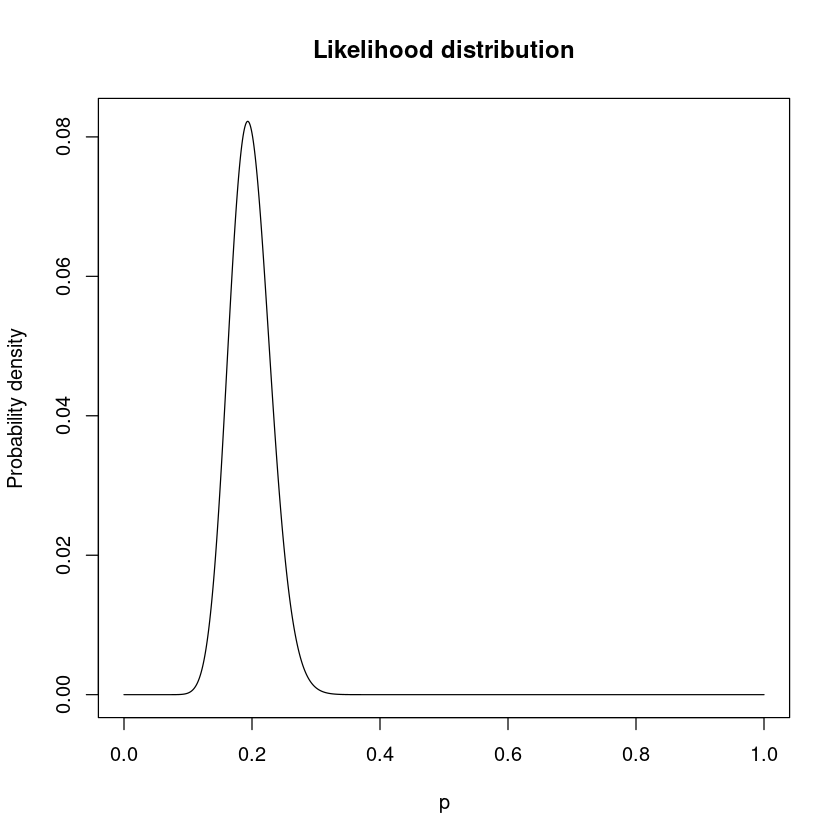

In [3]:
plot(x_p,dbinom(29,size = 150, prob = x_p), xlab = "p", ylab = "Probability density", t="l", main = "Likelihood distribution")

Since from bayesian theory the posterior is obtained as the normalized product between the likelihood and the prior, then by using a uniform prior the posterior will be the likelyhood itself, divided by a normalization factor

In [4]:
post_norm = integrate(function (x) dbinom(29,size = 150, prob = x), 0, 1)[[1]]

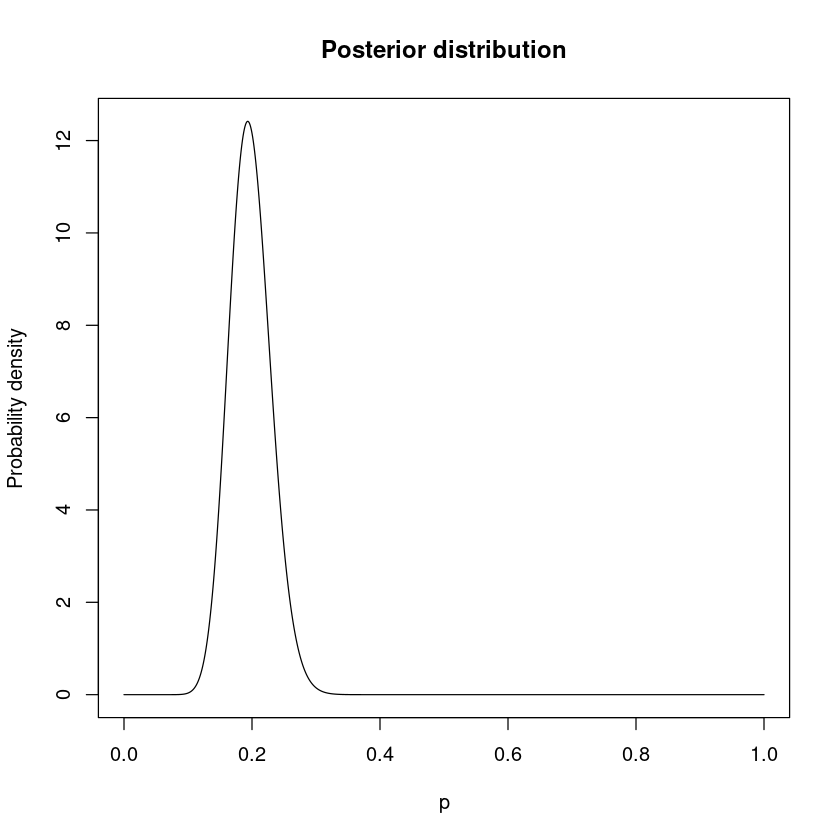

In [5]:
plot(x_p,dbinom(29,size = 150, prob = x_p)/post_norm, xlab = "p", ylab = "Probability density", t="l", main = "Posterior distribution")

Using this posterior distribution is possible to evaluate the distribution for the average number of person that read the journal according to the parameter p.

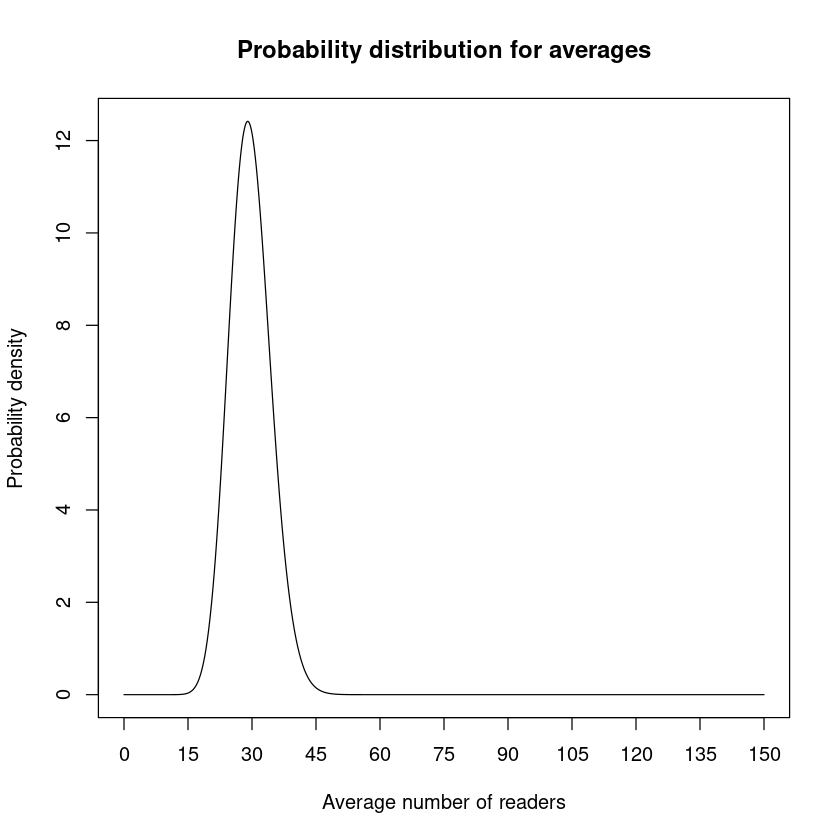

In [6]:
plot(150*x_p,dbinom(29,size = 150, prob = x_p)/post_norm, xlab = "Average number of readers", ylab = "Probability density", t="l", main = "Probability distribution for averages",xaxp  = c(0,150,10))

## Exercise 2

Since the phenomeno is again regarding success/failure event the likelihood is the binomial distribution with parameter p.

The first prior is simply the beta function with the parameters alfa and beta obtained from assigned mean and standard deviation as 
$$ \alpha = (\frac{1-\mu}{\sigma^2}-\frac{1}{\mu})\mu^2 \quad \beta = \alpha(\frac{1}{\mu} -1)$$

In [7]:
alfa = ((1-0.2)/0.08^2-1/0.2)*0.2^2
beta = alfa*(1/0.2 - 1)
prior1 = function(x) dbeta(x,shape1 = alfa, shape2 = beta)


The second prior is the uniform function with fixed bounds.

In [8]:
prior2 = function(x) dunif(x,min=0,max=1)

The third prior needs to be implemented 

In [9]:
prior3 = function(x) {case_when(
    (x<0.1) & (x>=0) ~ 20*x/0.7,
    (x<0.3) & (x>=0.1) ~ 2/0.7,
    (x<0.5) & (x>=0.3) ~ 5/0.7-10*x/0.7,
    x>=0.5 ~ 0
)}

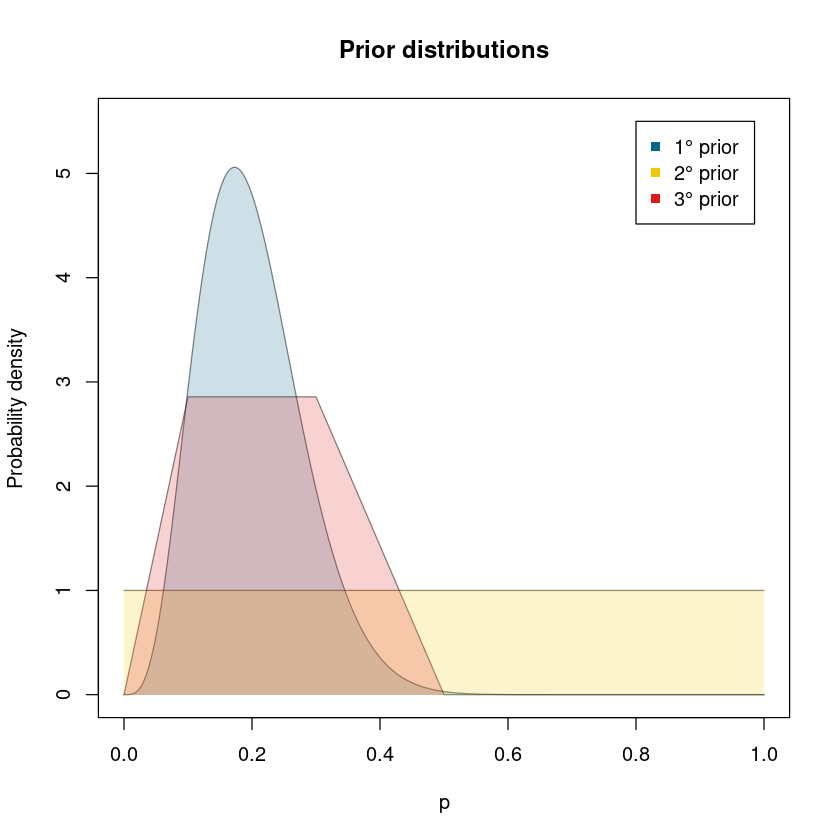

In [10]:
plot(x_p,prior1(x_p)            
     , xlab = "p", ylab = "Probability density", t="l"
     , main = "Prior distributions"
     , ylim = c(0,5.5), col = alpha("black",0.5))
lines(x_p,prior2(x_p), col =  alpha("black",0.5))
lines(x_p,prior3(x_p), col =  alpha("black",0.5))
polygon(x_p,prior1(x_p), col = rgb(8/255, 103/255, 136/255, alpha = 0.2), border = NA)
polygon(c(0,x_p,1),c(0,prior2(x_p),0), col = rgb(240/255, 200/255, 8/255, alpha = 0.2), border = NA)
polygon(x_p,prior3(x_p), col = rgb(221/255, 28/255, 26/255, alpha = 0.2), border = NA)

legend(x= 0.8, y= 5.5, legend=c("1° prior", "2° prior", "3° prior"),
       col=c(rgb(8/255, 103/255, 136/255),rgb(240/255, 200/255, 8/255), rgb(221/255, 28/255, 26/255)),
        pch= 15)

Now it is possible to calculate and plot the posteriors.

In [11]:
posterior1 = function(x){
    dbinom(26,size = 100, prob = x)*prior1(x)/integrate(function(x) dbinom(26,size = 100, prob = x)*prior1(x),0,1)[[1]]
}
posterior2 = function(x){
dbinom(26,size = 100, prob = x)*prior2(x)/integrate(function(x) dbinom(26,size = 100, prob = x)*prior2(x),0,1)[[1]]
}
posterior3 = function(x){
    dbinom(26,size = 100, prob = x)*prior3(x)/integrate(function(x) dbinom(26,size = 100, prob = x)*prior3(x),0,1)[[1]]
}

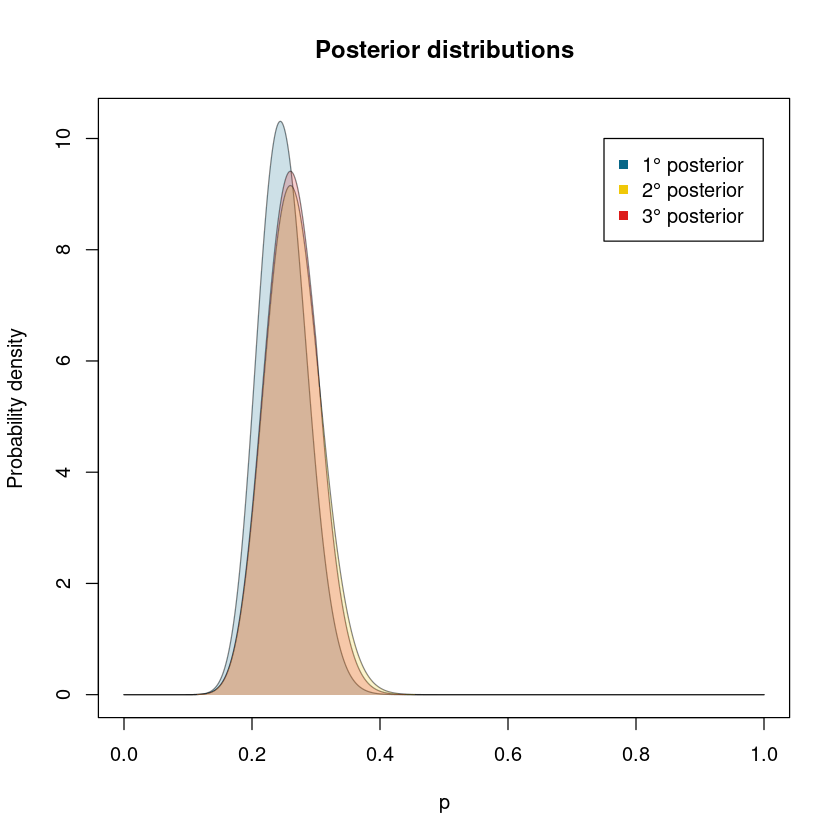

In [12]:
plot(x_p,posterior1(x_p)            
     , xlab = "p", ylab = "Probability density", t="l"
     , main = "Posterior distributions"
     , col = alpha("black",0.5))
lines(x_p,posterior2(x_p), col =  alpha("black",0.5))
lines(x_p,posterior3(x_p), col =  alpha("black",0.5))
polygon(x_p,posterior1(x_p), col = rgb(8/255, 103/255, 136/255, alpha = 0.2), border = NA)
polygon(x_p,posterior2(x_p), col = rgb(240/255, 200/255, 8/255, alpha = 0.2), border = NA)
polygon(x_p,posterior3(x_p), col = rgb(221/255, 28/255, 26/255, alpha = 0.2), border = NA)

legend(x= 0.75, y= 10, legend=c("1° posterior", "2° posterior", "3° posterior"),
       col=c(rgb(8/255, 103/255, 136/255),rgb(240/255, 200/255, 8/255), rgb(221/255, 28/255, 26/255)),
        pch= 15)

The most probable value is obtained as the one for which the density is maximum. Is estimated numerically by calculating the posterior over a very dense grid.

In [13]:
message("The best value for the first posterior is ",(which.max(posterior1(x_s))-1)*0.000001)
message("The best value for the second posterior is ",(which.max(posterior2(x_s))-1)*0.000001)
message("The best value for the third posterior is ",(which.max(posterior3(x_s))-1)*0.000001)

The best value for the first posterior is 0.244262

The best value for the second posterior is 0.26

The best value for the third posterior is 0.26



The credibility interval bounds can be obtained numerically using `uniroot()`, by finding for each side of the posterior the bound that if integrated gives an area of 0.025.

In [14]:
find_ci95 = function (pos) {
    low = uniroot(function(y){integrate(pos,0,y)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [15]:
s_dec <- function(x, k) trimws(format(round(x, k), nsmall=k))

In [16]:
message("The 95% credibility interval for the first posterior is [",s_dec(find_ci95(posterior1)[[1]], 4),",",s_dec(find_ci95(posterior1)[[2]],4),"]")
message("The 95% credibility interval for the second posterior is [",s_dec(find_ci95(posterior2)[[1]], 4),",",s_dec(find_ci95(posterior2)[[2]],4),"]")
message("The 95% credibility interval for the third posterior is [",s_dec(find_ci95(posterior3)[[1]], 4),",",s_dec(find_ci95(posterior3)[[2]],4),"]")

The 95% credibility interval for the first posterior is [0.1767,0.3278]

The 95% credibility interval for the second posterior is [0.1841,0.3540]

The 95% credibility interval for the third posterior is [0.1837,0.3461]



## Exercise 3

The serie of draws need to be translated into a binary representation in order do inference.

In [17]:
H = 1
T = 0
draws = c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,H, H)

Again, since the model is a simple binomial, the result is obtained by calculating the posterior distribution over p.

Assuming that the coin is fair is useful to define a prior with 0.5 mean, while the variance can be fixed 0.05.

In [18]:
alfa = ((1-0.5)/0.05-1/0.5)*0.5^2
beta = alfa*(1/0.5 - 1)
prior1 = function(x) dbeta(x,shape1 = alfa, shape2 = beta)

The second prior is the uniform function with fixed bounds

In [19]:
prior2 = function(x) dunif(x,min=0,max=1)

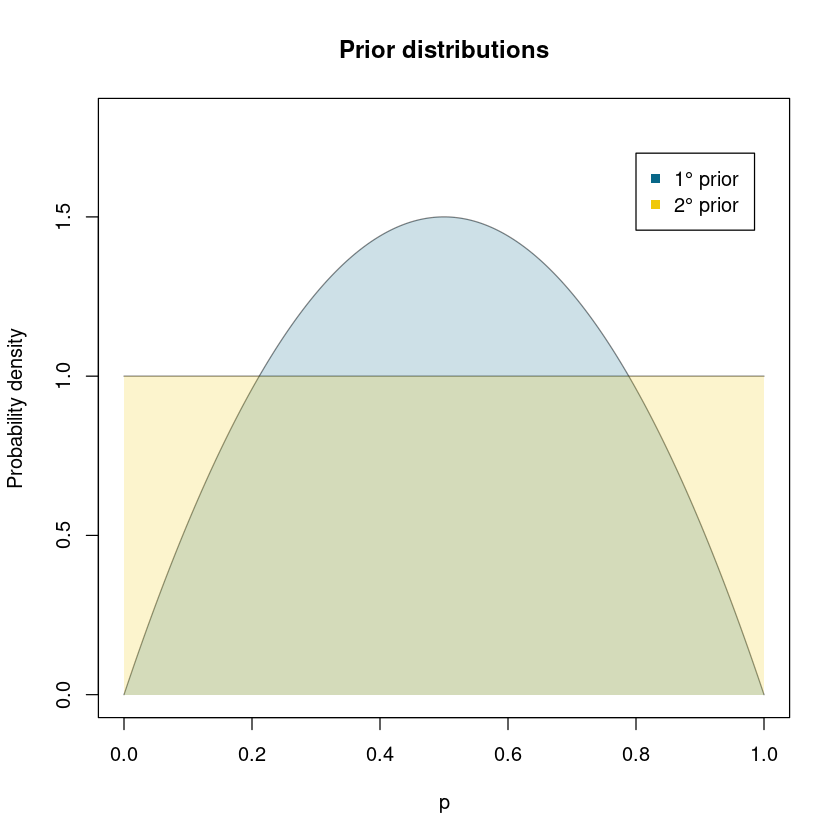

In [20]:
plot(x_p,prior1(x_p)            
     , xlab = "p", ylab = "Probability density", t="l"
     , main = "Prior distributions"
     , ylim = c(0,1.8), col = alpha("black",0.5))
lines(x_p,prior2(x_p), col =  alpha("black",0.5))
polygon(x_p,prior1(x_p), col = rgb(8/255, 103/255, 136/255, alpha = 0.2), border = NA)
polygon(c(0,x_p,1),c(0,prior2(x_p),0), col = rgb(240/255, 200/255, 8/255, alpha = 0.2), border = NA)

legend(x= 0.8, y= 1.7, legend=c("1° prior", "2° prior"),
       col=c(rgb(8/255, 103/255, 136/255),rgb(240/255, 200/255, 8/255)),
        pch= 15)

According to these priors is possible to find and plot the posterior distributions.

In [21]:
posterior1 = function(x,step = length(draws)){
    dbinom(sum(draws[1:step]),size = step, prob = x)*prior1(x)/integrate(function(x) dbinom(sum(draws[1:step]),size = step, prob = x)*prior1(x),0,1)[[1]]
}
posterior2 = function(x, step = length(draws)){
dbinom(sum(draws[1:step]),size = step, prob = x)*prior2(x)/integrate(function(x) dbinom(sum(draws[1:step]),size = step, prob = x)*prior2(x),0,1)[[1]]
}


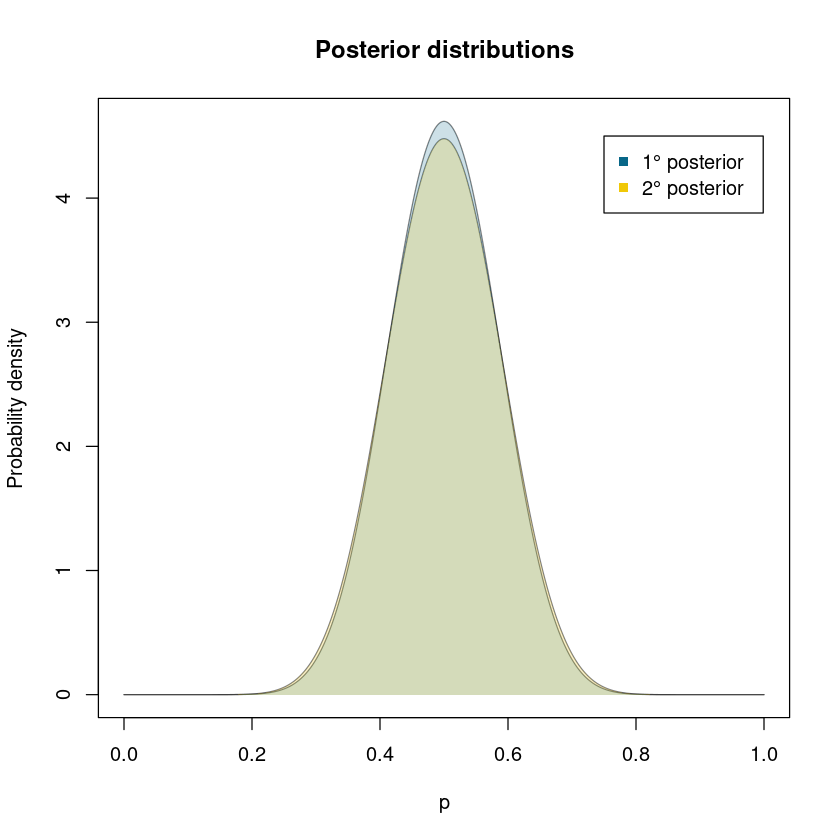

In [22]:
plot(x_p,posterior1(x_p),
     xlab = "p", ylab = "Probability density", t="l",
     main = "Posterior distributions",
     col = alpha("black",0.5))
lines(x_p,posterior2(x_p), col =  alpha("black",0.5))
polygon(x_p,posterior1(x_p), col = rgb(8/255, 103/255, 136/255, alpha = 0.2), border = NA)
polygon(x_p,posterior2(x_p), col = rgb(240/255, 200/255, 8/255, alpha = 0.2), border = NA)

legend(x= 0.75, y= 4.5, legend=c("1° posterior", "2° posterior"),
       col=c(rgb(8/255, 103/255, 136/255),rgb(240/255, 200/255, 8/255)),
        pch= 15)

In [23]:
message("The best value for the first posterior is ",(which.max(posterior1(x_s))-1)*0.000001)
message("The best value for the second posterior is ",(which.max(posterior2(x_s))-1)*0.000001)                                                      

The best value for the first posterior is 0.5

The best value for the second posterior is 0.5



In [24]:
message("The 95% credibility interval for the first posterior is [",s_dec(find_ci95(posterior1)[[1]], 4),",",s_dec(find_ci95(posterior1)[[2]],4),"]")
message("The 95% credibility interval for the second posterior is [",s_dec(find_ci95(posterior2)[[1]], 4),",",s_dec(find_ci95(posterior2)[[2]],4),"]")

The 95% credibility interval for the first posterior is [0.3355,0.6645]

The 95% credibility interval for the second posterior is [0.3306,0.6694]



By changing the step number is possible to see the evolution of the two posteriors.

In [25]:
b_value1 = (sapply(map(1:30,posterior1,x=x_s),which.max)-1)*0.000001
b_value2 = (sapply(map(1:30,posterior2,x=x_s),which.max)-1)*0.000001

Another function is needed in order to compute the evolution for credibility intervals

In [26]:
find_ci95_step = function (pos,step) {
    low = uniroot(function(y){integrate(pos,0,y, step = step)[[1]] - 0.025}, lower = 0, upper = 1)$root
    up = uniroot(function(y){integrate(pos,y,1, step = step)[[1]] - 0.025}, lower = 0, upper = 1)$root
    return(c(low,up))
}

In [27]:
c_value1 = matrix(unlist(map(1:30,find_ci95_step,pos= posterior1)), nrow = 30, ncol =2, byrow = TRUE)
c_value2 = matrix(unlist(map(1:30,find_ci95_step,pos= posterior2)), nrow = 30, ncol =2, byrow = TRUE)

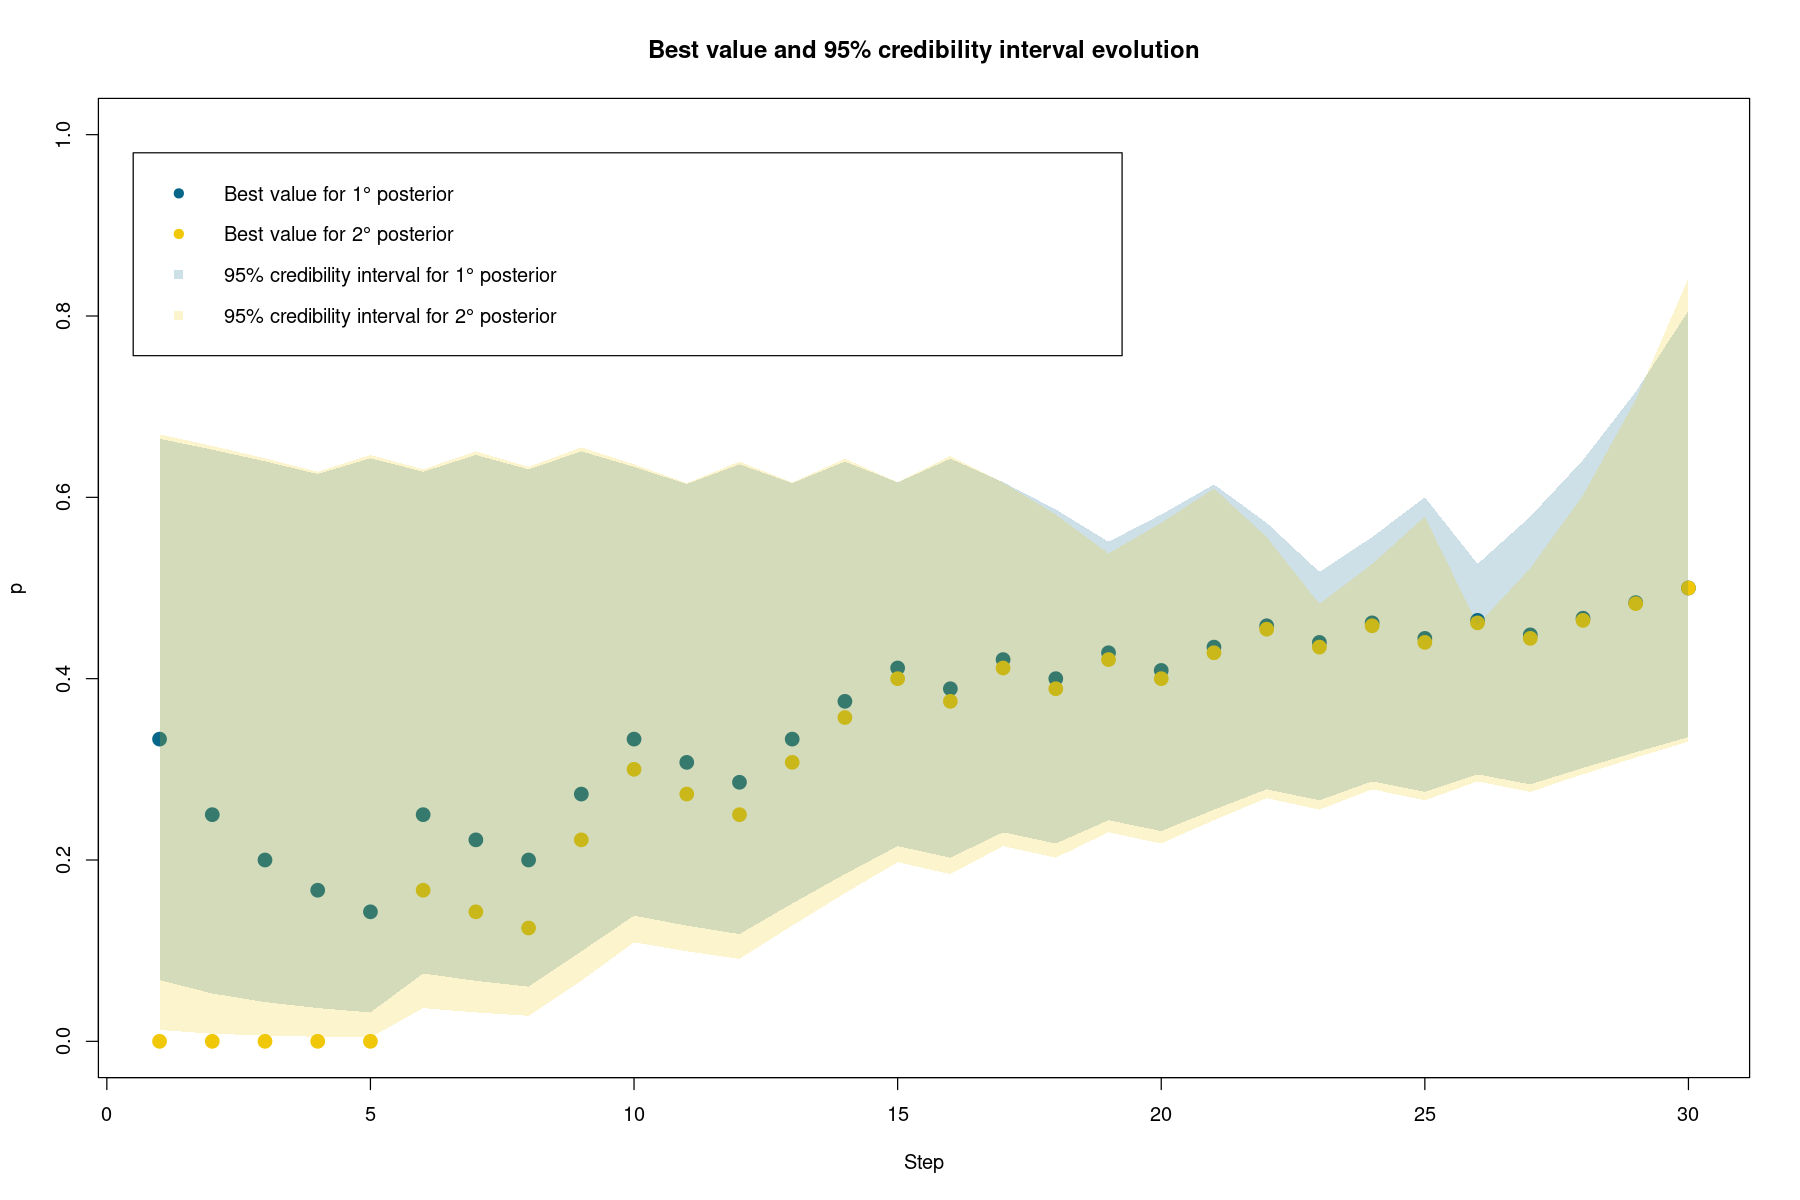

In [29]:
options(repr.plot.width=15, repr.plot.height=10)

plot(1:30,b_value1, ylim = c(0,1), pch = 19,
     cex = 1.5, col = rgb(8/255, 103/255, 136/255),
     xlab = "Step", ylab = "p",
     main = "Best value and 95% credibility interval evolution")
points(1:30,b_value2,pch = 19, cex = 1.5, col = rgb(240/255, 200/255, 8/255))
polygon(c(1:30,30:1),matrix(c_value1, ncol =1), col = rgb(8/255, 103/255, 136/255, alpha = 0.2), border = NA)
polygon(c(1:30,30:1),matrix(c_value2, ncol =1), col = rgb(240/255, 200/255, 8/255, alpha = 0.2), border = NA)
legend(x= 0.5, y= 0.98, legend=c("Best value for 1° posterior", "Best value for 2° posterior","95% credibility interval for 1° posterior", "95% credibility interval for 2° posterior"),
       col=c(rgb(8/255, 103/255, 136/255),rgb(240/255, 200/255, 8/255),rgb(8/255, 103/255, 136/255, alpha = 0.2),rgb(240/255, 200/255, 8/255, alpha = 0.2)),
        pch= c(19,19,15,15))